In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [4]:
control_df = df.query('group== "control"')

control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()

control_ctr

0.2364438839848676

In [7]:
experiment_df = df.query('group == "experiment"')

experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action =="view"').id.nunique()
                         
experiment_ctr                         

0.2668693009118541

In [8]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.030425416926986526

In [9]:
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

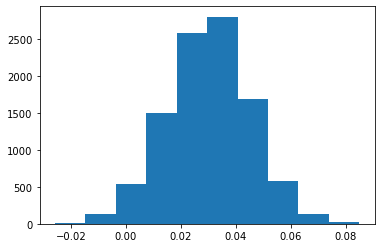

In [10]:
diffs = np.array(diffs)

plt.hist(diffs);

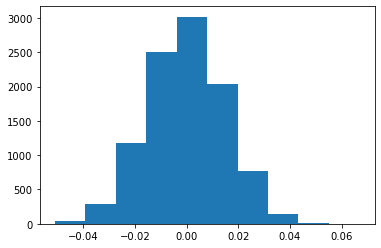

In [11]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)

plt.hist(null_vals);


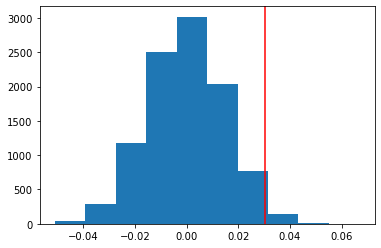

In [12]:
plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

In [13]:
(null_vals > obs_diff).mean()

0.0188